In [ ]:
pip uninstall numpy


Found existing installation: numpy None
Note: you may need to restart the kernel to use updated packages.


error: uninstall-no-record-file

Cannot uninstall numpy None

The package's contents are unknown: no RECORD file was found for numpy.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps numpy==1.26.4


In [ ]:
pip install numpy<2


Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [ ]:
import numpy as np
print(np.__version__)


2.2.5


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import joblib


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('german_credit_data.csv')

# Display the first few rows of the dataset
print(df.head())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car  


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('german_credit_data.csv')  # Replace with actual dataset path

# Create a 'Risk' column based on Credit amount
df['Risk'] = (df['Credit amount'] > 1000).astype(int)

# Drop the unnecessary 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Risk', axis=1)
y = df_encoded['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      1.00       167

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [11]:
# Get feature importance
feature_importances = clf.feature_importances_

# Get feature names
feature_names = X.columns

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print(feature_importance_df)


                        Feature  Importance
2                 Credit amount    0.804093
3                      Duration    0.065070
0                           Age    0.043086
1                           Job    0.017093
14            Purpose_education    0.008979
4                      Sex_male    0.008053
10    Checking account_moderate    0.007244
5                   Housing_own    0.006650
12                  Purpose_car    0.005474
11        Checking account_rich    0.005452
8    Saving accounts_quite rich    0.005215
13  Purpose_domestic appliances    0.003713
16             Purpose_radio/TV    0.003608
9          Saving accounts_rich    0.003494
6                  Housing_rent    0.003359
7      Saving accounts_moderate    0.003238
17              Purpose_repairs    0.003182
15  Purpose_furniture/equipment    0.002950
18      Purpose_vacation/others    0.000045


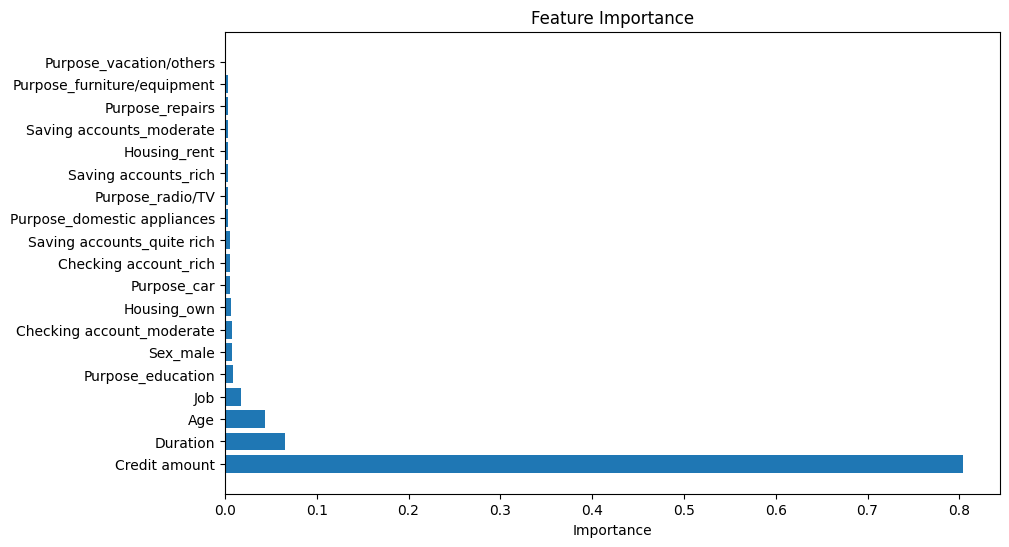

In [12]:
import matplotlib.pyplot as plt

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [13]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the model using the best parameters
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      1.00       167

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [ ]:
import tkinter as tk
from tkinter import messagebox
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Dummy model for illustration (replace this with your trained model)
class DummyModel:
    def predict(self, X):
        return [0]  # Example: Always predict low credit risk (0)

# Dummy model for illustration
model = DummyModel()

# Function to validate input and convert them into the right types
def validate_inputs(duration, credit_amount, age, feature1, feature2):
    try:
        # Ensure numeric inputs are valid
        duration = float(duration)
        credit_amount = float(credit_amount)
        age = float(age)
        
        # Ensure categorical inputs are either 0 or 1
        feature1 = int(feature1)
        feature2 = int(feature2)

        # Check if the features are binary (0 or 1)
        if feature1 not in [0, 1] or feature2 not in [0, 1]:
            raise ValueError("Feature1 and Feature2 must be either 0 or 1.")
        
        return duration, credit_amount, age, feature1, feature2
    except ValueError as e:
        messagebox.showerror("Invalid Input", f"Error: {e}")
        return None

# Function to predict risk based on inputs
def predict_risk():
    # Get inputs from Entry and OptionMenu widgets
    duration = duration_entry.get()
    credit_amount = credit_amount_entry.get()
    age = age_entry.get()
    feature1 = feature1_var.get()
    feature2 = feature2_var.get()
    
    # Validate inputs
    inputs = validate_inputs(duration, credit_amount, age, feature1, feature2)
    
    if inputs is not None:
        duration, credit_amount, age, feature1, feature2 = inputs

        # Prepare input data for prediction
        input_data = np.array([[duration, credit_amount, age, feature1, feature2]])
        
        # Example prediction (replace with actual model prediction)
        prediction = model.predict(input_data)[0]
        
        # Show result
        if prediction == 1:
            messagebox.showinfo("Prediction Result", "High Credit Risk")
        else:
            messagebox.showinfo("Prediction Result", "Low Credit Risk")

# Set up Tkinter window
root = tk.Tk()
root.title("Credit Risk Prediction")

# Add labels and entry fields for inputs
tk.Label(root, text="Duration (months)").grid(row=0, column=0)
duration_entry = tk.Entry(root)
duration_entry.grid(row=0, column=1)

tk.Label(root, text="Credit Amount").grid(row=1, column=0)
credit_amount_entry = tk.Entry(root)
credit_amount_entry.grid(row=1, column=1)

tk.Label(root, text="Age").grid(row=2, column=0)
age_entry = tk.Entry(root)
age_entry.grid(row=2, column=1)

tk.Label(root, text="Feature1").grid(row=3, column=0)
feature1_var = tk.StringVar()
feature1_menu = tk.OptionMenu(root, feature1_var, "0", "1")
feature1_menu.grid(row=3, column=1)

tk.Label(root, text="Feature2").grid(row=4, column=0)
feature2_var = tk.StringVar()
feature2_menu = tk.OptionMenu(root, feature2_var, "0", "1")
feature2_menu.grid(row=4, column=1)

# Add Predict button
predict_button = tk.Button(root, text="Predict Risk", command=predict_risk)
predict_button.grid(row=5, columnspan=2)

# Start Tkinter main loop
root.mainloop()
